<a href="https://colab.research.google.com/github/BagusRezky/Machine-Learning/blob/main/11%20-%20OCR/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas**

## Mendeteksi orientasi teks dan jenis skrip
Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.
**Tugas:**
**1. Persiapan Gambar:**
- Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
- Tampilkan gambar asli menggunakan Python dan OpenCV.<br>

**2. Deteksi Orientasi dan Skrip:**
- Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
- Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
- Tampilkan hasil orientasi dan jenis skrip.

In [ ]:
# Mount Google Drive agar dapat mengakses dataset yang disimpan di Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt install tesseract-ocr # menginstal Tesseract OCR di lingkungan Linux.
!pip install pytesseract # Menginstal pustaka Pytesseract, yang merupakan antarmuka Python untuk Tesseract OCR.
!pip install tesseract # Menginstal pustaka Tesseract melalui PyPI.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


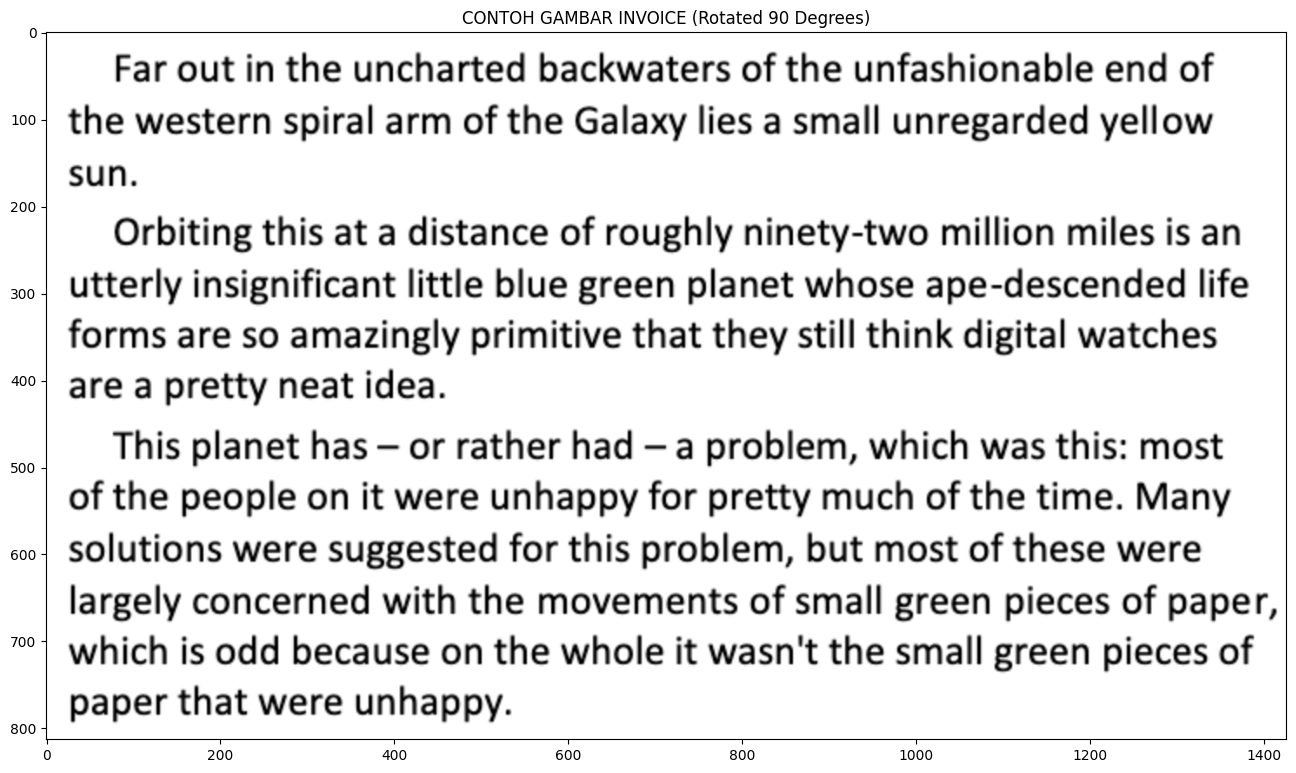

Orientasi Teks: 1.5707963705062866 derajat
Jenis Skrip: 

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



In [ ]:
import cv2 # OpenCV adalah pustaka komputer vision yang digunakan untuk memproses gambar.
import pytesseract # Antarmuka Python untuk Tesseract OCR
import numpy as np # Numpy digunakan untuk manipulasi array dan operasi matriks.
from matplotlib import pyplot as plt # untuk menampilkan gambar dengan Matplotlib.

# Membaca gambar dari direktori
image = cv2.imread('/content/drive/MyDrive/images/hitchhikers-rotated.png')

# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE (Rotated 90 Degrees)')
plt.show()

# Konversi gambar ke grayscale
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Temukan garis menggunakan transformasi Hough
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Ambil sudut rotasi dari garis yang terdeteksi
angle = lines[0][0][1] if lines is not None else 0

# Menggunakan Tesseract untuk mendapatkan jenis skrip
script_type = pytesseract.image_to_string(rotated_image)

# Tampilkan hasil orientasi dan jenis skrip
print(f"Orientasi Teks: {angle} derajat")
print(f"Jenis Skrip: \n\n{script_type}")